In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_dataset.csv')

In [3]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:33:33,11:45:29,sunny,high,2,snack,motorcycle,0,no,urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:37,19:51:49,stormy,jam,2,snack,scooter,1,no,metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:32:58,08:48:47,sandstorms,low,0,drinks,motorcycle,1,no,urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:03:58,18:12:52,sunny,medium,0,buffet,motorcycle,1,no,metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:34:16,13:45:36,cloudy,high,1,snack,scooter,1,no,metropolitian,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39903,0x4e21,BANGRES16DEL03,28,4.9,13.029198,77.570997,13.059198,77.600997,2022-03-30,21:57:44,22:03:10,sandstorms,jam,1,meal,scooter,1,no,metropolitian,29
39904,0x1178,RANCHIRES16DEL01,35,4.2,23.371292,85.327872,23.481292,85.437872,2022-03-08,21:47:47,21:59:27,windy,jam,2,drinks,motorcycle,1,no,metropolitian,33
39905,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:36:22,11:48:07,windy,high,1,meal,motorcycle,0,no,metropolitian,32
39906,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:56,00:08:55,cloudy,low,1,drinks,scooter,0,no,metropolitian,16


In [4]:
import numpy as np

# Haversine function to calculate distance
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    
    r = 6371  # Earth radius in kilometers
    return c * r

# Apply function to entire DataFrame
df['distance_km'] = haversine_distance(
    df['Restaurant_latitude'],
    df['Restaurant_longitude'],
    df['Delivery_location_latitude'],
    df['Delivery_location_longitude']
)
df['distance_km'] = df['distance_km'].round(2)


In [5]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:33:33,...,sunny,high,2,snack,motorcycle,0,no,urban,24,3.03
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:37,...,stormy,jam,2,snack,scooter,1,no,metropolitian,33,20.18
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:32:58,...,sandstorms,low,0,drinks,motorcycle,1,no,urban,26,1.55
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:03:58,...,sunny,medium,0,buffet,motorcycle,1,no,metropolitian,21,7.79
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:34:16,...,cloudy,high,1,snack,scooter,1,no,metropolitian,30,6.21


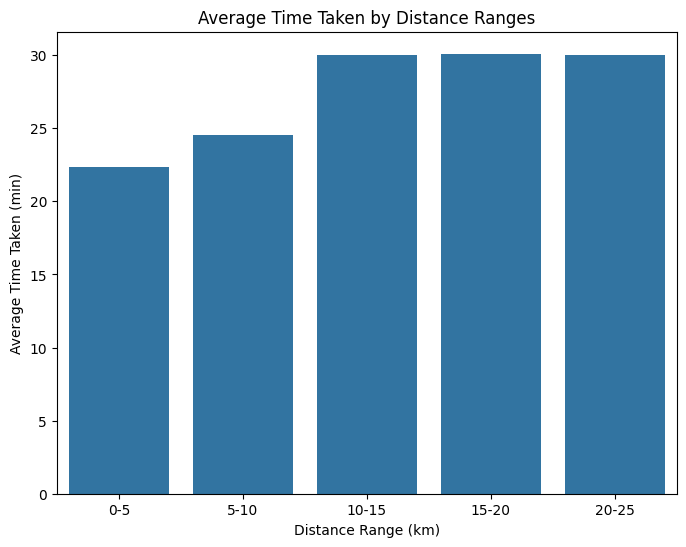

In [6]:
# Bin distance into categories
df['distance_bin'] = pd.cut(df['distance_km'], bins=[0, 5, 10, 15, 20, 25], labels=['0-5','5-10','10-15','15-20','20-25'])

# Group and calculate average time
avg_time_by_distance = df.groupby('distance_bin')['Time_taken(min)'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='distance_bin', y='Time_taken(min)', data=avg_time_by_distance)
plt.title('Average Time Taken by Distance Ranges')
plt.xlabel('Distance Range (km)')
plt.ylabel('Average Time Taken (min)')
plt.show()


In [7]:
df['Order_Datetime'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Time_Orderd'], errors='coerce')
df['Pickup_Datetime'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Time_Order_picked'], errors='coerce')

# Time taken from order to pickup (optional feature)
df['prep_time_min'] = (df['Pickup_Datetime'] - df['Order_Datetime']).dt.total_seconds() / 60
df.loc[:,'prep_time_min'] = df['prep_time_min'].round(2)


In [8]:
df['order_hour'] = df['Order_Datetime'].dt.hour
df['order_day'] = df['Order_Datetime'].dt.dayofweek
df['is_weekend']= df['order_day'].apply(lambda x: 1 if x >= 5 else 0)  # Saturday and Sunday

In [9]:
# Remove rows with negative prep_time_min
df = df[df['prep_time_min'] >= 0]

In [10]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km,distance_bin,Order_Datetime,Pickup_Datetime,prep_time_min,order_hour,order_day,is_weekend
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:33:33,11:45:29,sunny,high,2,snack,motorcycle,0,no,urban,24,3.03,0-5,2022-03-19 11:33:33,2022-03-19 11:45:29,11.93,11,5,1
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:37,19:51:49,stormy,jam,2,snack,scooter,1,no,metropolitian,33,20.18,20-25,2022-03-25 19:45:37,2022-03-25 19:51:49,6.20,19,4,0
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:32:58,08:48:47,sandstorms,low,0,drinks,motorcycle,1,no,urban,26,1.55,0-5,2022-03-19 08:32:58,2022-03-19 08:48:47,15.82,8,5,1
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:03:58,18:12:52,sunny,medium,0,buffet,motorcycle,1,no,metropolitian,21,7.79,5-10,2022-04-05 18:03:58,2022-04-05 18:12:52,8.90,18,1,0
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:34:16,13:45:36,cloudy,high,1,snack,scooter,1,no,metropolitian,30,6.21,5-10,2022-03-26 13:34:16,2022-03-26 13:45:36,11.33,13,5,1


In [11]:
df.to_csv('data_before_modeling.csv', index=False)

In [12]:
correlation = df['prep_time_min'].corr(df['Time_taken(min)'])
print(f"Correlation between prep_time_min and Time_taken(min): {correlation:.2f}")

Correlation between prep_time_min and Time_taken(min): -0.01


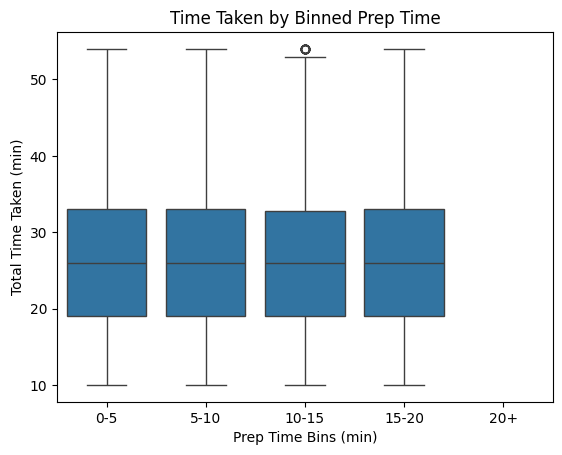

In [13]:
df['prep_bin'] = pd.cut(df['prep_time_min'], bins=[0, 5, 10, 15, 20, 60], 
                        labels=['0-5','5-10','10-15','15-20','20+'])

# Boxplot of delivery time across prep bins
sns.boxplot(x='prep_bin', y='Time_taken(min)', data=df)
plt.title('Time Taken by Binned Prep Time')
plt.xlabel('Prep Time Bins (min)')
plt.ylabel('Total Time Taken (min)')
plt.show()

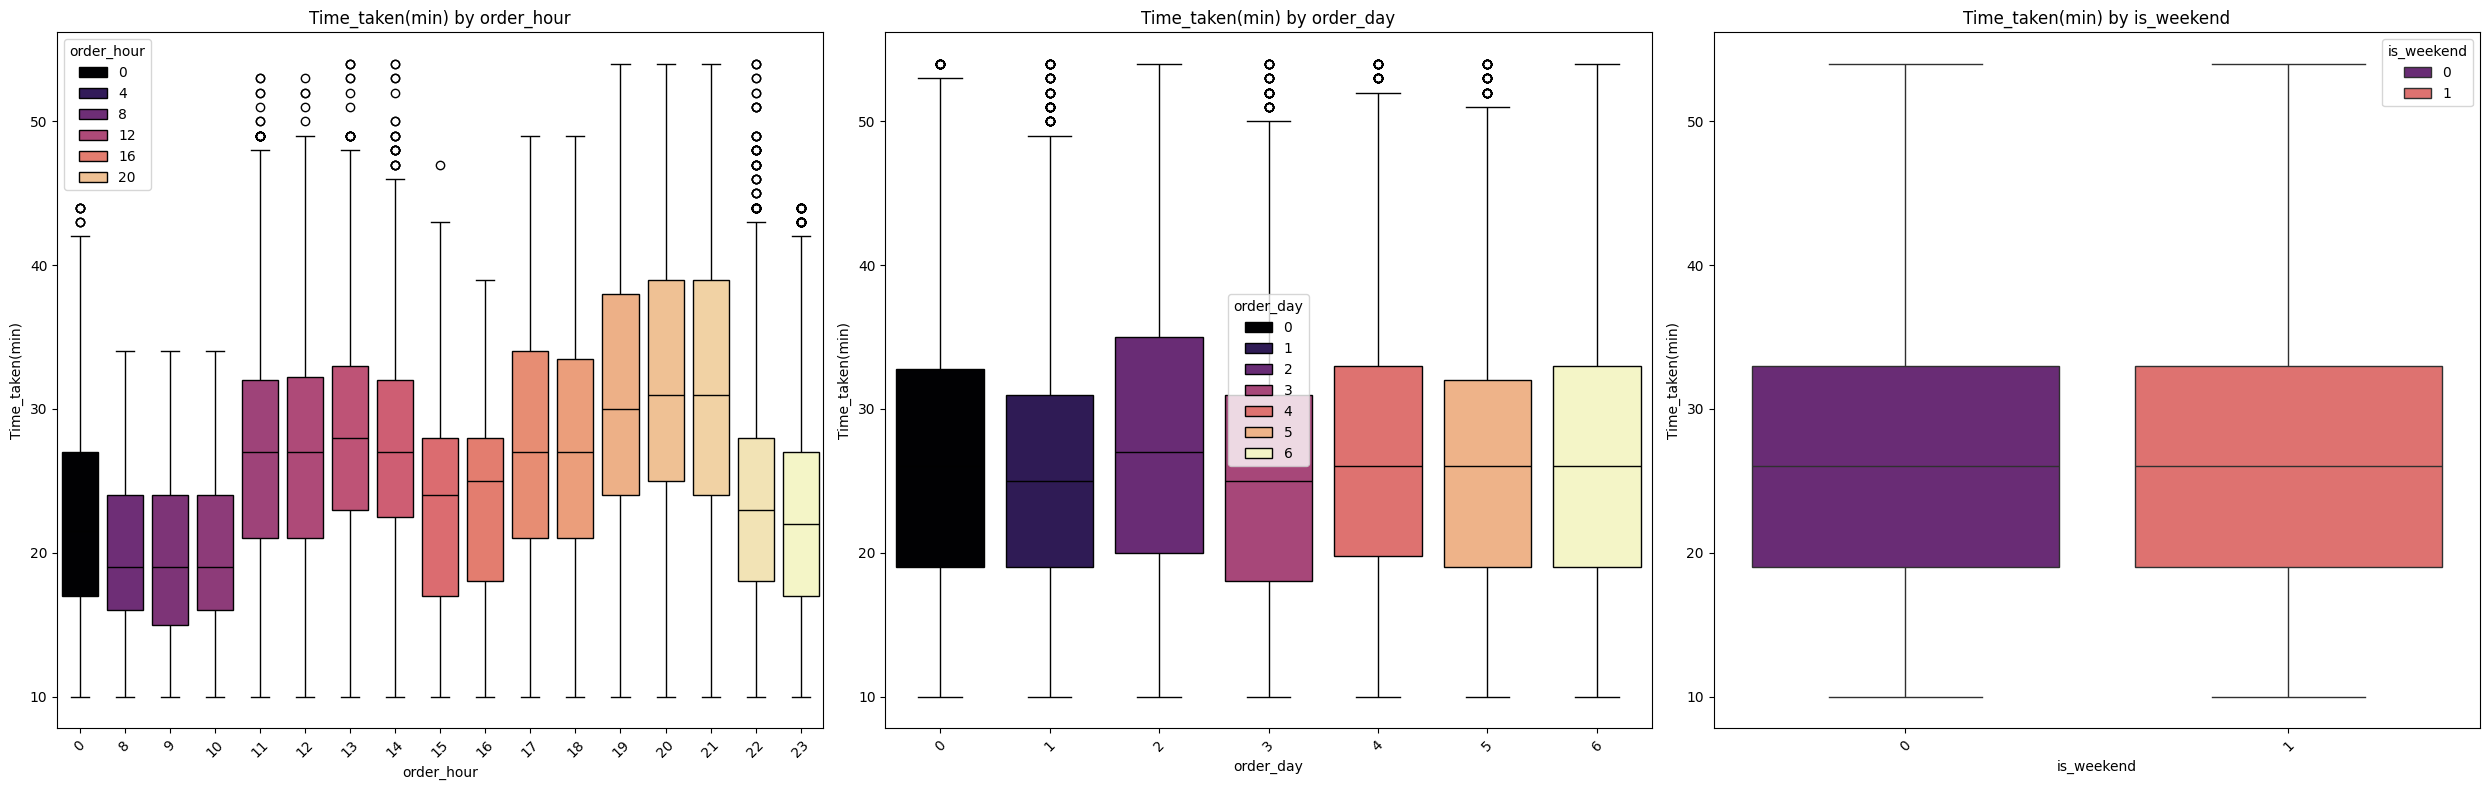

In [14]:
features = ['order_hour','order_day','is_weekend']
fig, axes = plt.subplots(1,3, figsize=(25, 8))
axes = axes.flatten()
# Choose the target variable
target = 'Time_taken(min)'

# Loop and plot
for i, col in enumerate(features):
    sns.boxplot(x=col, y=target, data=df, ax=axes[i], hue=col,palette='magma')
    axes[i].set_title(f'{target} by {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [15]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km,distance_bin,Order_Datetime,Pickup_Datetime,prep_time_min,order_hour,order_day,is_weekend,prep_bin
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:33:33,11:45:29,sunny,high,2,snack,motorcycle,0,no,urban,24,3.03,0-5,2022-03-19 11:33:33,2022-03-19 11:45:29,11.93,11,5,1,10-15
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:37,19:51:49,stormy,jam,2,snack,scooter,1,no,metropolitian,33,20.18,20-25,2022-03-25 19:45:37,2022-03-25 19:51:49,6.20,19,4,0,5-10
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:32:58,08:48:47,sandstorms,low,0,drinks,motorcycle,1,no,urban,26,1.55,0-5,2022-03-19 08:32:58,2022-03-19 08:48:47,15.82,8,5,1,15-20
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:03:58,18:12:52,sunny,medium,0,buffet,motorcycle,1,no,metropolitian,21,7.79,5-10,2022-04-05 18:03:58,2022-04-05 18:12:52,8.90,18,1,0,5-10
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:34:16,13:45:36,cloudy,high,1,snack,scooter,1,no,metropolitian,30,6.21,5-10,2022-03-26 13:34:16,2022-03-26 13:45:36,11.33,13,5,1,10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39902,0xc9ab,KNPRES03DEL01,30,4.2,26.469003,80.316344,26.539003,80.386344,2022-02-14,18:14:33,18:29:13,cloudy,medium,1,snack,motorcycle,2,yes,metropolitian,42,10.45,10-15,2022-02-14 18:14:33,2022-02-14 18:29:13,14.67,18,0,0,10-15
39903,0x4e21,BANGRES16DEL03,28,4.9,13.029198,77.570997,13.059198,77.600997,2022-03-30,21:57:44,22:03:10,sandstorms,jam,1,meal,scooter,1,no,metropolitian,29,4.66,0-5,2022-03-30 21:57:44,2022-03-30 22:03:10,5.43,21,2,0,5-10
39904,0x1178,RANCHIRES16DEL01,35,4.2,23.371292,85.327872,23.481292,85.437872,2022-03-08,21:47:47,21:59:27,windy,jam,2,drinks,motorcycle,1,no,metropolitian,33,16.60,15-20,2022-03-08 21:47:47,2022-03-08 21:59:27,11.67,21,1,0,10-15
39905,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:36:22,11:48:07,windy,high,1,meal,motorcycle,0,no,metropolitian,32,1.49,0-5,2022-03-24 11:36:22,2022-03-24 11:48:07,11.75,11,3,0,10-15


In [16]:
# dropping the unnecessary columns
df = df.drop(columns=['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude',	'Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked','Order_Datetime','Pickup_Datetime'])

In [17]:
df = df.drop(columns=['distance_bin','prep_bin'])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# 2. Encode categorical features
categorical_cols = ['Weatherconditions', 'Road_traffic_density', 'Type_of_vehicle',
                    'Festival', 'City', 'Type_of_order']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 3. Define features and target
X = df.drop('Time_taken(min)', axis=1)
y = df['Time_taken(min)']

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scale continuous numerical features
numerical_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'distance_km', 'prep_time_min']
scaler = StandardScaler()

# Scale only the numerical columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training set target shape:", y_train.shape)
print("Test set target shape:", y_test.shape)



Training set shape: (31292, 15)
Test set shape: (7824, 15)
Training set target shape: (31292,)
Test set target shape: (7824,)


# Using different models


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
mse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f"R2 Score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


R2 Score: 0.49
Root Mean Squared Error: 6.73
Mean Absolute Error: 5.43
